In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_log_error

# Regression algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn import svm
from sklearn.svm import LinearSVR


from math import sqrt
from sklearn.model_selection import *
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

In [2]:
#sns.set(rc={'figure.figsize':(25,10)})


In [3]:
#testdata = pd.read_csv('/Users/rimshad/Desktop/Course work/machine learning/test.csv')
train = pd.read_csv('/Users/rimshad/Desktop/Course work/machine learning/train.csv')
#train = pd.concat([testdata, traindata], ignore_index=False, sort=True)

In [4]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [90]:
train.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.00000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.00000
mean,730.171198,57.667157,3.031594,68.571815,9942.427627,0.995591,1.991183,2.782513,0.000735,3.021308,0.058046,12.033064,2.025716,2.006613,0.523145,3.004409,5.936811,5.577517,1969.829537,1983.73108,1.368846,1.061719,9.578986,10.286554,1.759001,87.696901,2.604702,3.730345,1.368112,2.357825,2.815577,2.334313,2.811903,408.437913,4.716385,46.212344,558.416605,1013.066863,1.038207,1.619398,0.930198,1121.894195,321.362234,5.849375,1449.105805,0.402645,0.059515,1.526084,0.366642,2.844967,1.049963,2.417340,6.368846,5.739162,0.564291,2.260103,1977.305657,1.282880,1.700955,452.906686,3.869949,3.900073,1.845702,86.878766,44.049229,22.439383,3.657605,14.880970,2.199118,46.652461,6.315944,2007.803086,7.504041,3.765614,168628.77737
std,421.621254,43.279344,0.648324,19.480355,7721.048536,0.066275,1.394816,0.704828,0.027106,1.622539,0.266257,5.987703,0.870302,0.261417,1.226401,1.923151,1.266237,1.108812,30.029232,20.80041,0.804783,0.526375,3.201075,3.546150,0.593440,158.754067,0.626222,0.734665,0.728907,0.788119,0.657932,1.120953,1.870406,403.981886,0.910125,157.169461,433.239482,379.747442,0.304396,1.747445,0.254906,340.001292,407.862401,47.939101,442.968450,0.512599,0.242807,0.536412,0.500033,0.802701,0.227846,0.757779,1.519200,0.996465,0.622273,1.792124,24.013761,0.793397,0.719113,203.059556,0.599007,0.523289,0.512776,119.075319,64.400549,61.334901,30.350701,55.196699,36.594429,513.719542,2.705406,1.329868,1.560125,1.111514,62084.19264
min,1.000000,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1872.000000,1950.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.00000
25%,366.000000,20.000000,3.000000,60.000000,7350.000000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,7.000000,2.000000,2.000000,0.000000

In [5]:
train.shape

(1460, 81)

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [7]:
#Dropping features with very high missing values
#train.drop(columns=['MiscFeature','Fence','PoolQC','FireplaceQu','Alley'])

#Seperating features and Label


In [8]:
# checking outliers

In [9]:
train.drop(["Alley"],axis=1,inplace=True)
train.drop(["Fence"],axis=1,inplace=True)
train.drop(["PoolQC"],axis=1,inplace=True)
train.drop(["FireplaceQu"],axis=1,inplace=True)
train.drop(["MiscFeature"],axis=1,inplace=True)
train.drop(["Electrical"],axis=1,inplace=True)

In [10]:
# dealing with missing values
# Numerical
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mean())
train['BsmtFinSF1']=train['BsmtFinSF1'].fillna(train['BsmtFinSF1'].mean())
train['BsmtFinSF2']=train['BsmtFinSF2'].fillna(train['BsmtFinSF2'].mean())
train['BsmtUnfSF']=train['BsmtUnfSF'].fillna(train['BsmtUnfSF'].mean())
train['TotalBsmtSF']=train['TotalBsmtSF'].fillna(train['TotalBsmtSF'].mean())
train['BsmtFullBath']=train['BsmtFullBath'].fillna(train['BsmtFullBath'].mean())
train['BsmtHalfBath']=train['BsmtHalfBath'].fillna(train['BsmtHalfBath'].mean())
train['GarageYrBlt']=train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
train['GarageCars']=train['GarageCars'].fillna(train['GarageCars'].mean())
train['GarageArea']=train['GarageArea'].fillna(train['GarageArea'].mean())

# Categorical
train['MSZoning']=train['MSZoning'].fillna(train['MSZoning'].mode()[0])
train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['Exterior1st']=train['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
train['Exterior2nd']=train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
train['MasVnrType']=train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['BsmtQual']=train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['BsmtFinType1']=train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])
train['BsmtFinType2']=train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])
train['KitchenQual']=train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])
train['Functional']=train['Functional'].fillna(train['Functional'].mode()[0])
train['GarageType']=train['GarageType'].fillna(train['GarageType'].mode()[0])
train['GarageFinish']=train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageQual']=train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['GarageCond']=train['GarageCond'].fillna(train['GarageCond'].mode()[0])
train['SaleType']=train['SaleType'].fillna(train['SaleType'].mode()[0])
train['BsmtExposure']=train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['Utilities']=train['Utilities'].fillna(train['Utilities'].mode()[0])

In [11]:
cat_cols = [col for col in train.columns if train[col].dtype == "object"]

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in cat_cols:
    train[col] = label_encoder.fit_transform(train[col])

In [13]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.000000,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.000000,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.000000,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.000000,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.000000,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000
5,6,50,3,85.000000,14115,1,0,3,0,4,0,11,2,2,0,0,5,5,1993,1995,1,1,12,13,2,0.0,3,4,5,2,3,3,2,732,5,0,64,796,1,0,1,796,566,0,1362,1,0,1,1,1,1,3,5,6,0,1,1993.0,2,2,480,4,4,2,40,30,0,320,0,0,700,10,2009,8,4,143000
6,7,20,3,75.000000,10084,1,3,3,0,4,0,21,2,2,0,2,8,5,2004,2005,1,1,12,13,3,186.0,2,4,2,0,3,0,2,1369,5,0,317,1686,1,0,1,1694,0,0,1694,1,0,2,0,3,1,2,7,6,1,1,2004.0,1,2,636,4,4,2,255,57,0,0,0,0,0,8,2007,8,4,307000
7,8,60,3,70.049958,10382,1,0,3,0,0,0,14,4,2,0,5,7,6,1973,1973,1,1,6,6,3,240.0,3,4,1,2,3,2,0,859,1,32,216,1107,1,0,1,1107,983,0,2090,1,0,2,1,3,1,3,7,6,2,1,1973.0,1,2,484,4,4,2,235,204,228,0,0,0,350,11,2009,8,4,200000
8,9,50,4,51.000000,6120,1,3,3,0,4,0,17,0,2,0,0,7,5,1931,1950,1,1,3,15,2,0.0,3,4,0,3,3,3,5,0,5,0,952,952,1,2,1,1022,752,0,1774,0,0,2,0,2,2,3,8,2,2,5,1931.0,2,2,468,1,4,2,90,0,205,0,0,0,0,4,2008,8,0,129900
9,10,190,3,50.000000,7420,1,3,3,0,0,0,3,0,0,1,1,5,6,1939,1950,1,1,8,8,2,0.0,3,4,0,3,3,3,2,851,5,0,140,991,1,0,1,1077,0,0,1077,1,0,1,0,2,2,3,5,6,2,1,1939.0,1,1,205,2,4,2,0,4,0,0,0,0,0,1,2008,8,4,118000


In [14]:
X=train.drop(columns=['SalePrice'])
y=train[['SalePrice']]

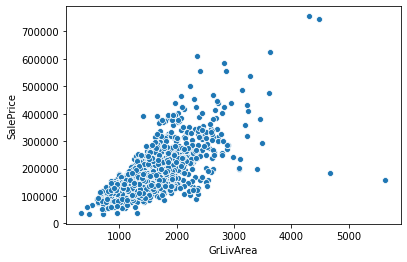

In [15]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)

In [16]:
train.drop(train[train['GrLivArea'] > 4000].index, inplace = True)

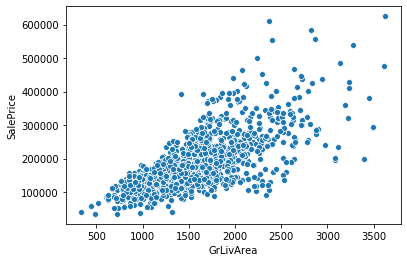

In [17]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)

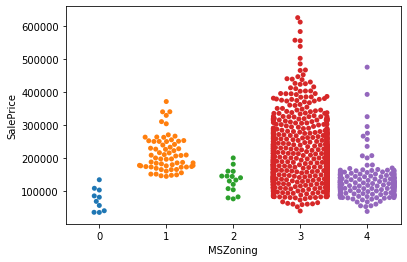

In [18]:
sns.swarmplot(x='MSZoning', y='SalePrice', data=train)

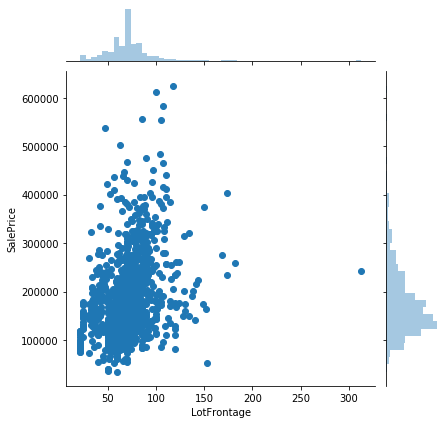

In [19]:
sns.jointplot(x='LotFrontage', y='SalePrice', data=train)

In [20]:
train.drop(train[train['LotFrontage'] > 200].index, inplace = True)

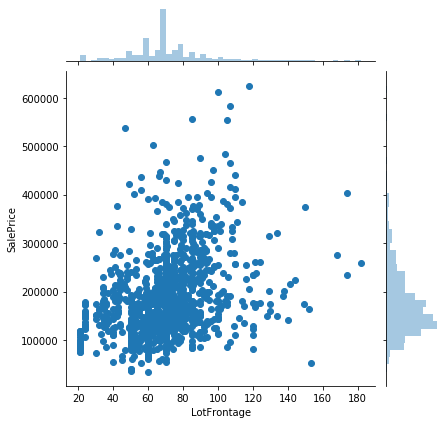

In [21]:
sns.jointplot(x='LotFrontage', y='SalePrice', data=train)

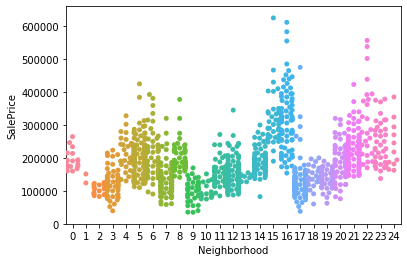

In [22]:
sns.swarmplot(x='Neighborhood', y='SalePrice', data=train)

In [23]:
train.drop(train[train['SalePrice'] > 500000].index, inplace = True)

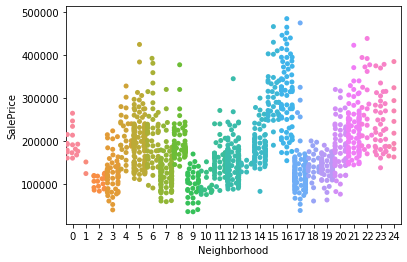

In [24]:
sns.swarmplot(x='Neighborhood', y='SalePrice', data=train)

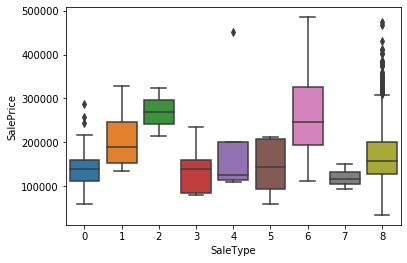

In [25]:
sns.boxplot(x='SaleType', y='SalePrice', data=train)

In [26]:
#train[train["SaleType"] == 'ConLI']

In [27]:
train.drop(train[(train["SalePrice"] > 220000) & (train["SaleType"] == 0)].index, inplace = True)
train.drop(train[(train["SalePrice"] > 280000) & (train["SaleType"] == 8)].index, inplace = True)
#train.drop(train[(train["SalePrice"] > 420000) & (train["SaleType"] == 4)].index, inplace = True)

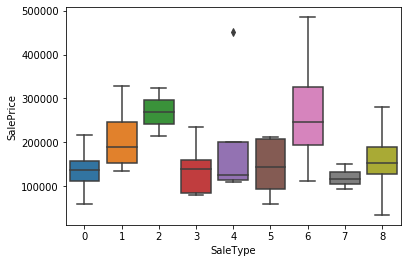

In [28]:
sns.boxplot(x='SaleType', y='SalePrice', data=train)

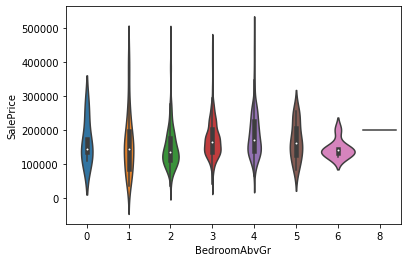

In [29]:
sns.violinplot(x='BedroomAbvGr', y='SalePrice', data=train)

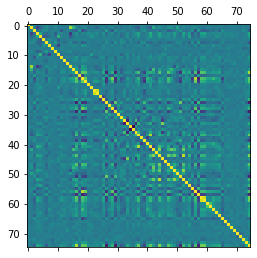

In [30]:
import matplotlib.pyplot as plt

plt.matshow(train.corr())
plt.show()


In [31]:
#split the training dataset to understand in and out sample performance.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1168, 74) (292, 74) (1168, 1) (292, 1)


In [32]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000


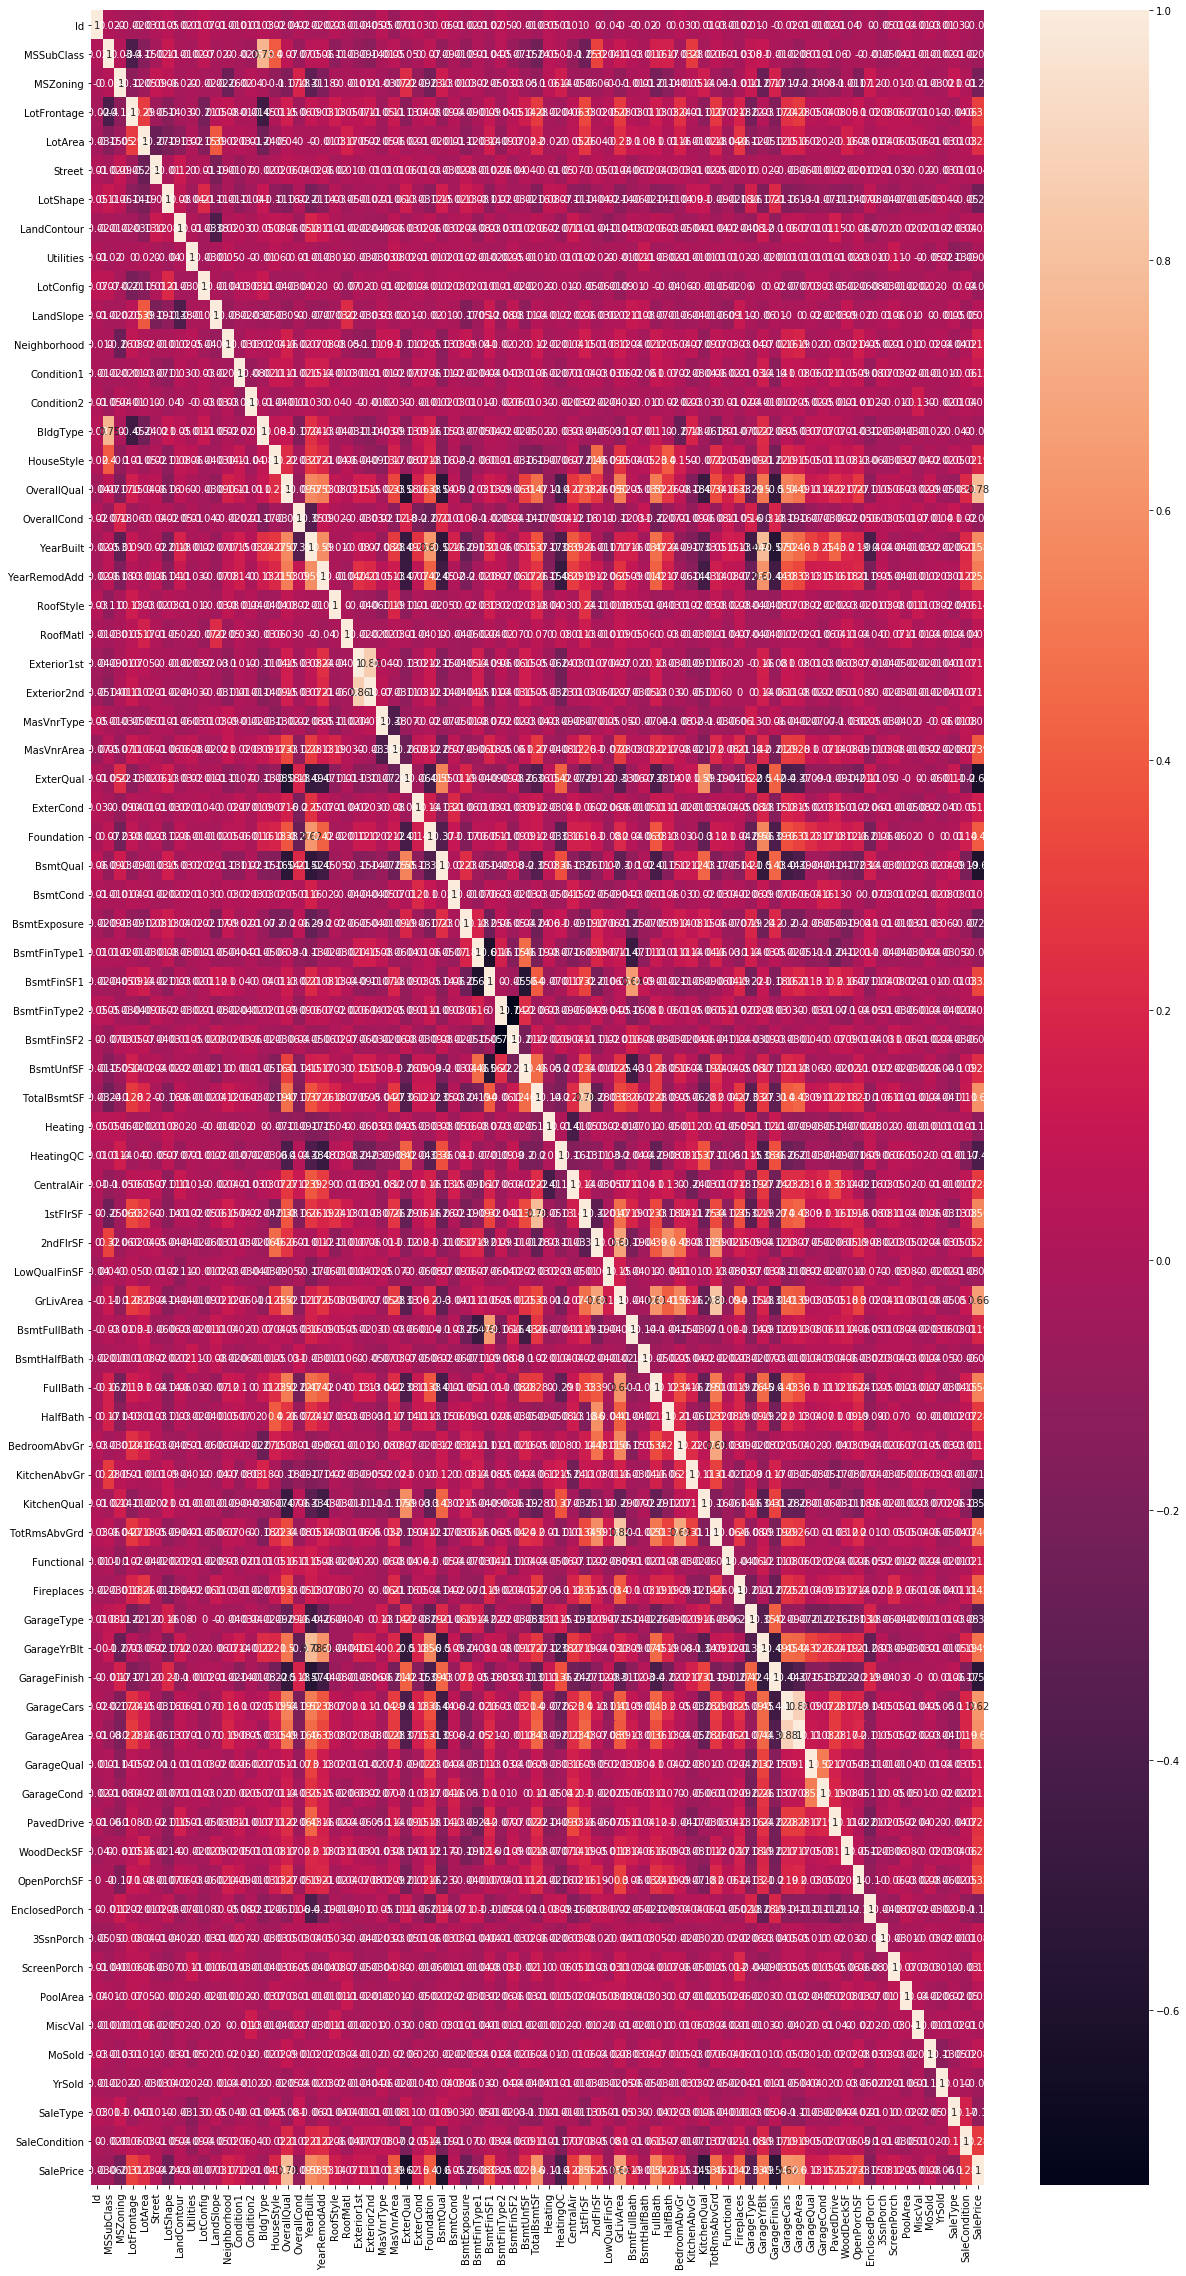

In [33]:
plt.figure(figsize=(20,40))
correlation_matrix = train.corr().round(2)
sns.heatmap(data = correlation_matrix, annot=True)

In [34]:
# Building pipelines

In [35]:
#Seperate numerical and categorical features
num_feat=X_train.select_dtypes(include='number').columns.to_list()
cat_feat=X_train.select_dtypes(exclude='number').columns.to_list()

#Pipeline to handle numerical features
num_pipe=Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components = 11, random_state = 0))
])

#Pipeline to handle categorical features
cat_pipe=Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

#Transforming numerical and categorical data using pipeline
ct=ColumnTransformer(remainder='drop',
                    transformers=[
                        ('numerical', num_pipe, num_feat),
                        ('categorical', cat_pipe, cat_feat)
                    ])


model0=Pipeline([
    ('transformer', ct),   
    ('predictor', RandomForestRegressor(random_state=0))
])

#Building the model2
model2=Pipeline([
    ('transformer', ct),   
    ('predictor', LinearRegression(normalize=True))
])
model3=Pipeline([
    ('transformer', ct),
    ('predictor',RANSACRegressor(base_estimator=LinearRegression(), max_trials=100))
])
model4=Pipeline([
    ('transformer', ct),
    ('predictor',Ridge(alpha=100, solver='sparse_cg' , tol=0.0001, random_state=42)) 
])
model5=Pipeline([
        ('transformer', ct),
    ('predictor',Lasso(alpha=0.1, precompute=True, positive=True, selection='random', random_state=42))
])
model6=Pipeline([
    ('transformer', ct),
    ('predictor',SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000))
])
model7=Pipeline([
    ('transformer', ct),
    ('predictor',ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42))
])
model8=Pipeline([
    ('transformer', ct),
    ('predictor',LinearSVR(epsilon=1))
])

In [36]:
model = PCA()
model.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'cumulative explained variance')

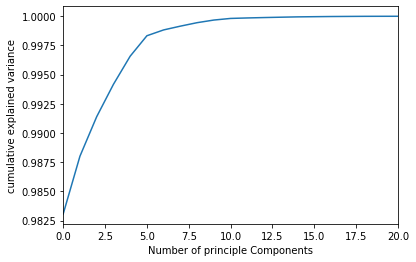

In [37]:
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlim(0,20,1)
plt.xlabel('Number of principle Components')
plt.ylabel('cumulative explained variance')

In [38]:
X=train.drop(columns=['SalePrice'])
y=train[['SalePrice']]

In [39]:
#Random Forest Regression

In [40]:
model0.fit(X_train,y_train);

In [41]:
y_pred=model0.predict(X_test)

In [42]:
cvf2 = cross_val_score(model0, X, y, cv=10, n_jobs=-1)
cvf2.mean()

0.8656349020366736

In [84]:
res = pd.DataFrame({
     'Id':X_test['Id'],
     'SalePrice': y_pred
 })
res.to_csv('submi.csv', index=False)

In [87]:
res.describe()

,Id,SalePrice
count,292.000000,292.000000
mean,697.756849,181412.513822
std,420.740060,79005.008343
min,2.000000,35611.490544
25%,333.250000,124810.433774
50%,660.000000,173849.034483
75%,1061.250000,222251.714373
max,1453.000000,695900.345300


In [85]:
res.head()

,Id,SalePrice
529,530,244470.053426
491,492,139132.200331
459,460,112719.580870
279,280,225492.069072
655,656,75680.578420


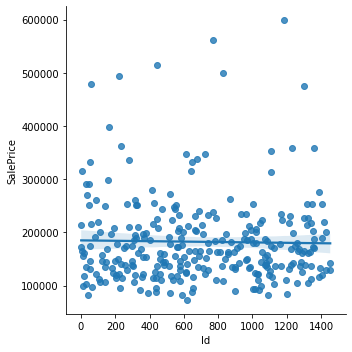

In [79]:
sns.lmplot(x='Id', y='SalePrice', data=res)

In [46]:
#Linear regression

In [47]:
model2.fit(X_train,y_train);

In [48]:
y_pred=model2.predict(X_test)

In [52]:
cvf2 = cross_val_score(model2, X, y, cv=10, n_jobs=-1)
cvf2.mean()

0.8439721346332669

In [81]:
result = pd.DataFrame({
     'Id':X_test['Id'],
     'SalePrice': y_pred
 })
result.to_csv('subm.csv', index=False)

In [88]:
result.describe()

,Id,SalePrice
count,292.000000,292.000000
mean,697.756849,181412.513822
std,420.740060,79005.008343
min,2.000000,35611.490544
25%,333.250000,124810.433774
50%,660.000000,173849.034483
75%,1061.250000,222251.714373
max,1453.000000,695900.345300


In [82]:
result.head()

,Id,SalePrice
529,530,244470.053426
491,492,139132.200331
459,460,112719.580870
279,280,225492.069072
655,656,75680.578420


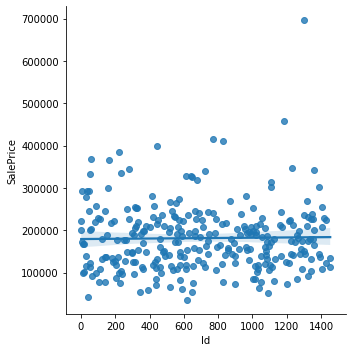

In [77]:
sns.lmplot(x='Id', y='SalePrice', data=result)

In [ ]:
# Robust regression

In [54]:
model3.fit(X_train,y_train);

In [55]:
y_pred=model3.predict(X_test)

In [56]:
cvf3 = cross_val_score(model3, X, y, cv=10, n_jobs=-1)
cvf3.mean()

0.8025794227406605

In [57]:
#Ridge Regression

In [58]:
model4.fit(X_train,y_train);

In [59]:
y_pred=model4.predict(X_test)

In [60]:
cvf4 = cross_val_score(model4, X, y, cv=10, n_jobs=-1)
cvf4.mean()

0.8439109365051772

In [61]:
#LASSO REGRESSION

In [62]:
model5.fit(X_train,y_train);

In [63]:
y_pred=model5.predict(X_test)

In [64]:
cvf5 = cross_val_score(model5, X, y, cv=10, n_jobs=-1)
cvf5.mean()

0.8078772347290922

In [65]:
#STOCHASTIC GRADIENT DESCENT

In [66]:
model6.fit(X_train,y_train);

In [67]:
y_pred=model6.predict(X_test)

In [68]:
cvf6 = cross_val_score(model6, X, y, cv=10, n_jobs=-1)
cvf6.mean()

0.8439718202495179

In [69]:
# Elastic regression

In [70]:
model7.fit(X_train,y_train);

In [71]:
y_pred=model7.predict(X_test)

In [72]:
cvf7 = cross_val_score(model7, X, y, cv=10, n_jobs=-1)
cvf7.mean()

0.8439821326308026

In [73]:
submission = pd.DataFrame({
     'Id':X_test['Id'],
     'SalePrice': y_pred
 })
submission.to_csv('submission.csv', index=False)

In [83]:
submission.head()

,Id,SalePrice
529,530,244470.053426
491,492,139132.200331
459,460,112719.580870
279,280,225492.069072
655,656,75680.578420


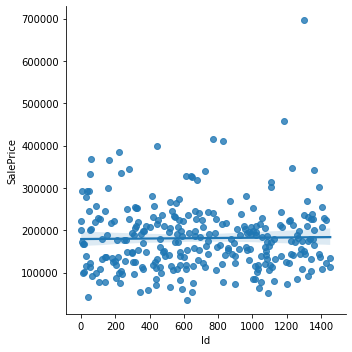

In [75]:
sns.lmplot(x='Id', y='SalePrice', data=submission)

In [89]:
submission.describe()

,Id,SalePrice
count,292.000000,292.000000
mean,697.756849,181412.513822
std,420.740060,79005.008343
min,2.000000,35611.490544
25%,333.250000,124810.433774
50%,660.000000,173849.034483
75%,1061.250000,222251.714373
max,1453.000000,695900.345300
